In [1]:
import pandas as pd
import numpy as np


In [22]:
train = pd.read_csv('train_data_new.csv')
test = pd.read_csv('test_data_new.csv')

In [23]:
train.shape

(949190, 11)

In [24]:
test.shape

(49958, 11)

In [25]:
train.head()

,transcript_position,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean,label
0,0.070326,0.005577,0.019601,0.598997,0.018997,0.029356,0.677419,0.026248,0.034558,0.186585,0.0
1,0.017461,0.025266,0.008820,0.536341,0.038947,0.031589,0.454094,0.034439,0.017915,0.385366,0.0
2,0.043093,0.081460,0.021107,0.611529,0.016503,0.025957,0.677419,0.019637,0.008289,0.314634,1.0
3,0.112672,0.084840,0.028732,0.511278,0.036526,0.025277,0.578164,0.075390,0.035483,0.269512,1.0
4,0.181396,0.079770,0.048109,0.548872,0.082441,0.018091,0.196030,0.138544,0.008669,0.275610,0.0


In [26]:
test.head()

,transcript_position,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean,label
0,0.077001,0.022478,0.010277,0.385965,0.018630,0.007749,0.354839,0.016381,0.011498,0.368293,1.0
1,0.025471,0.087375,0.005177,0.271930,0.083174,0.007895,0.255583,0.045885,0.017154,0.257317,0.0
2,0.037272,0.115261,0.023341,0.548872,0.029192,0.015032,0.615385,0.120782,0.008452,0.347561,1.0
3,0.034816,0.025266,0.020815,0.411028,0.023471,0.010954,0.627792,0.055654,0.010247,0.340244,1.0
4,0.016660,0.030843,0.016444,0.548872,0.017016,0.033629,0.540943,0.036017,0.021070,0.307317,0.0


In [27]:
X_train = train.drop(["label"], axis=1)
y_train = train['label']
X_test = test.drop(["label"], axis=1)
y_test = test['label']

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [29]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)


Epoch 1/50
26696/26696 [==============================] - 157s 6ms/step - loss: 0.5822 - accuracy: 0.6928 - val_loss: 0.5546 - val_accuracy: 0.7175
Epoch 2/50
26696/26696 [==============================] - 134s 5ms/step - loss: 0.5646 - accuracy: 0.7067 - val_loss: 0.5493 - val_accuracy: 0.7186
Epoch 3/50
26696/26696 [==============================] - 140s 5ms/step - loss: 0.5603 - accuracy: 0.7099 - val_loss: 0.5453 - val_accuracy: 0.7224
Epoch 4/50
26696/26696 [==============================] - 147s 6ms/step - loss: 0.5575 - accuracy: 0.7122 - val_loss: 0.5483 - val_accuracy: 0.7243
Epoch 5/50
26696/26696 [==============================] - 135s 5ms/step - loss: 0.5563 - accuracy: 0.7132 - val_loss: 0.5409 - val_accuracy: 0.7251
Epoch 6/50
26696/26696 [==============================] - 220s 8ms/step - loss: 0.5549 - accuracy: 0.7141 - val_loss: 0.5402 - val_accuracy: 0.7263
Epoch 7/50
26696/26696 [==============================] - 142s 5ms/step - loss: 0.5540 - accuracy: 0.7147 - val_

In [30]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


1562/1562 [==============================] - 3s 2ms/step - loss: 0.5458 - accuracy: 0.7235
Test Accuracy: 72.35%


In [31]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to class labels

print(classification_report(y_test, y_pred_classes))


1562/1562 [==============================] - 2s 1ms/step
              precision    recall  f1-score   support

         0.0       0.73      0.71      0.72     25034
         1.0       0.72      0.73      0.73     24924

    accuracy                           0.72     49958
   macro avg       0.72      0.72      0.72     49958
weighted avg       0.72      0.72      0.72     49958



1562/1562 [==============================] - 2s 1ms/step


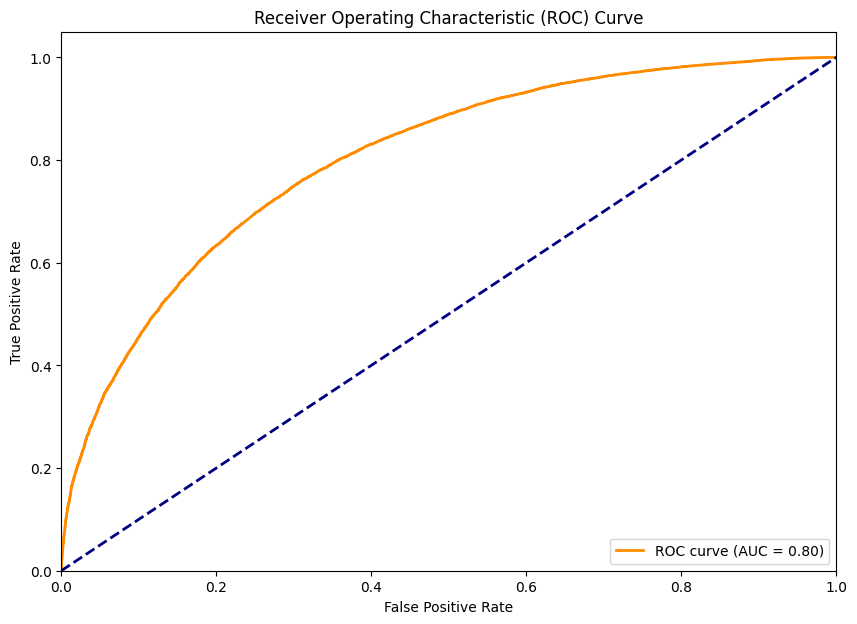

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_probs = model.predict(X_test).ravel()  # Get predicted probabilities

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
